In [1]:
# we need to read frames from the movie
# so we install opencv-python - change the next cell type to "Code"

In [2]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from openpiv import pyprocess, piv

In [5]:
vidcap = cv2.VideoCapture('/home/user/Downloads/cavity.mov')
# vidcap = cv2.VideoCapture('../test_movie/Manikin_Thermal_Plume.MOV')
success, image1 = vidcap.read()
count = 0
U = []
V = []

while success:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    # print('Read a new frame: ', success)
    if success:
        x,y,u,v,s2n = piv.simple_piv(image1.sum(axis=2), \
            image2.sum(axis=2), plot=False);
        image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)

In [6]:
U = np.stack(U)
Umean = np.nanmean(U, axis=0)
V = np.stack(V)
Vmean = np.nanmean(V,axis=0)

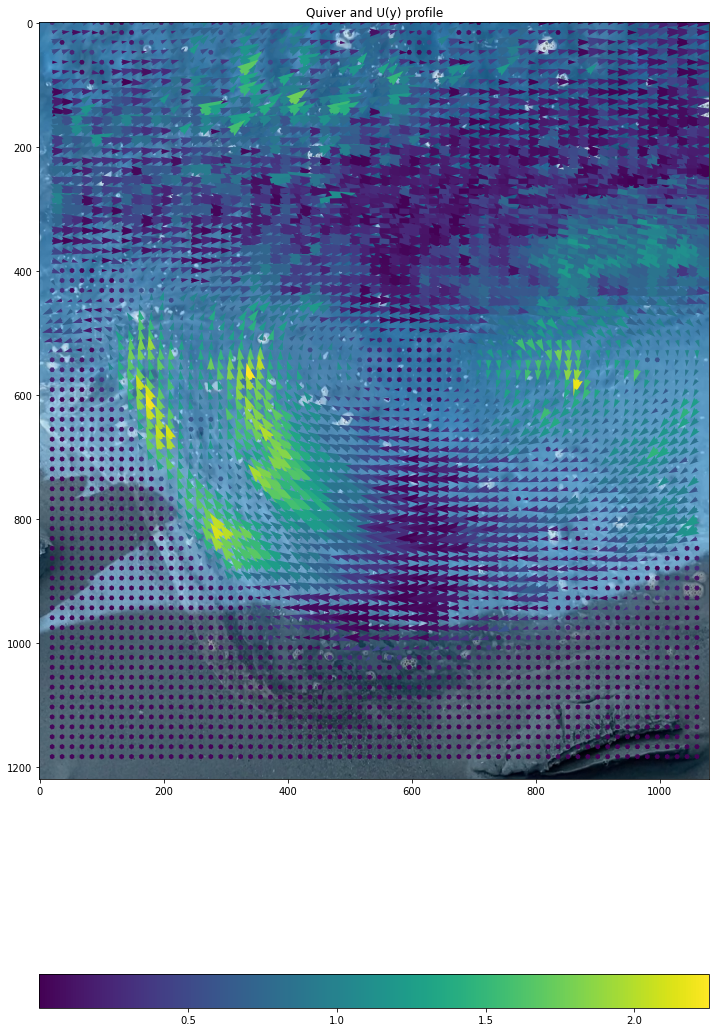

In [22]:
fig,ax = plt.subplots(figsize=(12,24))
ax.imshow(image1,cmap='gray')
cm = ax.quiver(x,y.max()-y,Umean,Vmean,np.abs(Vmean),scale=90,width=.008)
# plt.show()
# plt.plot(x[10,:], np.nanmean(Vmean[:10],axis=0)*100+200,color='r',lw=3)
# plt.plot(np.nanmean(Umean,axis=1)*2+50,y[:,5],lw=3,color='k')
plt.title('Quiver and U(y) profile')
plt.colorbar(cm, orientation='horizontal');